In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize, StandardScaler 
from os import listdir
from os.path import isfile, join
from numpy import *
#from sklearn.cluster import OPTICS, cluster_optics_dbscan 

import re
%matplotlib notebook

# Import Labels/Data 

In [2]:
# in_out_germinal = r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Data In Out Germinal"
# in_germinal = r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Data In Germinal"
# out_germinal = r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Data Out Germinal"
# unlabelled_tissue = r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Data Unlabelled Tonsil"

# python_data_path= r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Python Data"
# results_store_path = r"/home/thomas/coskun-lab/Shambavi/Paper/Results"

# python_data_path= r"/home/thomas/coskun-lab/Shambavi/Paper/Data/Main Data/Python Data"
# os.chdir(python_data_path)

In [3]:
# pixel_in = np.load('pixel_in_zero.npy',allow_pickle=True)
# pixel_out = np.load('pixel_out_zero.npy',allow_pickle=True)
# pixel_in_out = np.load('pixel_in_out_zero.npy',allow_pickle=True)
# pixel_none = np.load('pixel_unlabelled_zero.npy',allow_pickle=True)

In [4]:
in_germinal_labels = np.load('./data/in_germinal_labels.npy',allow_pickle=True)
out_germinal_labels = np.load('./data/out_germinal_labels.npy',allow_pickle=True)
in_out_germinal_labels = np.load("./data/in_out_germinal_labels.npy",allow_pickle =True)
unlabelled_labels = np.load("./data/unlabelled_tissue_labels.npy",allow_pickle =True)

### Define Dictionaries

In [7]:
dict_in = [63.5783,384.718,1,396.99,405.08,413.53,'E',430.86,436.73,452.94,459.05,66.06,468.907,474.994,479.897,500.29,501.91,513.86,520.791,529.955,544.986,553.915,72.9484,570.99,586.834,593.993,610.801,73.9818,75.09,79.12,78.97,79.18,80.06,'frag',1.01,96.06,96.8653,94.97,106.839,112.02,112.13,116.865,117.821,120.853,121.875,13.02,123.863,133.35,134.19,140.2,141.1,143.3,143.892,144.83,149.23,148.15,16,149.871,154.97,155.831,158,158.795,159.96,160.97,165.03,163.14,164.95,17.01,166.97,'168Er-',171.3,166.3,171.59,172.97,180.731,'head',192.815,199.01,35.45,200.701,207.663,208.78,214.99,216.747,224.34,224.01,229.1,227.36,241.28,42.0035,237.801,243.32,245.25,498.1661667,561.218581,624.2709952,687.3234095,'Frag','fragment-R-CO-H',264.685,50.04,274.664,276.2,282.9,284.48,295.27,300.5,308.75,313.85,316.54,'chain',332.74,333.14,337.92,343.568,359.22,2,361.616,363.642,370.618,381.06]
immune_labels_in = [141.1,143.3,148.15,158,158.795,149.871,154.97,155.831,160.97,163.14,164.95,166.97,'168Er-',165.03,166.3,171.3,171.59,172.97,192.815]
dict_out = [66.06,'1',396.99,405.08,413.53,'E',430.86,436.751,452.94,459.05,468.942,73.0543,474.925,479.874,500.29,501.869,513.86,520.85,529.947,544.965,553.889,570.912,74.0836,586.817,593.954,610.791,75.09,79.12,78.97,79.18,80.06,'frag',96.06,1.01,97.0846,94.97,107.099,112.02,112.13,116.98,117.658,121.147,122.028,124.163,16,127.131,133.35,131.169,134.19,138.182,140.2,141.27,143.27,144.199,145.152,17.01,149.23,148.304,149.233,150.119,152.247,155.28,156.177,158,159.103,161.26,35.45,165.03,165.29,167.31,168.26,171.3,166.3,171.3,173.2,181.068,'head',42.0048,190.214,191.259,193.106,199.01,201.032,208.018,209.078,214.99,217.078,224.34,50.04,224.01,229.1,227.36,241.28,238.009,243.32,245.25,498.1661667,561.218581,624.2709952,'chain',687.3234095,'Frag','fragment-R-CO-H',264.971,274.954,276.2,284.48,295.27,300.5,63.5728,308.75,313.85,316.54,332.74,333.14,337.92,344.044,359.22,2,381.06]
immune_out = [141.27,143.27,148.304,150.119,155.28,156.177,158,159.103,161.26,165.03,165.29,167.31,168.26,171.3,173.2,191.259,193.106,190.214]
immune_in_out = [141.375,143.363,148.4,150.385,151.368,155.393,156.39,158,159.309,161.405,165.03,165.367,167.404,171.388,193.398,171.3,196.388]

In [8]:
org_labels_in = in_germinal_labels[2:]
org_out_labels = out_germinal_labels[2:]

in_labels = dict(zip(org_labels_in, dict_in)) 
out_labels = dict(zip(org_out_labels, dict_out)) 

## 3D heat map with all slices

In [11]:
def get_pixel_k(pv, k=5):
    i = 1
    total_slices = int(len(pv[i,:])/(256*256))
    slices = total_slices//k+1 if total_slices%k != 0 else total_slices//k
    final = np.zeros([len(pv),256*256, slices])
    for i in range(len(pv)):
        y = np.split(pv[i,:],len(pv[i,:])/(256*256))
        for j in range(slices):
            final[i,:,j] = np.mean(y[j*k:(j+1)*k], axis = 0)
    return final

def get_df_3d_k(pixel_path, labels, k=5):
    pixel = np.load(pixel_path,allow_pickle=True)
    
    final = get_pixel_k(pixel, k)
    final = final.reshape(len(final), -1)
      
    final_T = final.transpose()

    df = pd.DataFrame(data= final_T,columns = labels)
    
#     df = df.drop(['total','rest'],1)
    df.rename(columns=in_labels, inplace=True)
    df.rename(columns=out_labels, inplace=True)
    
    return df

def get_pixel(pv):
    i = 1
    final = np.zeros([len(pv),256*256,int(len(pv[i,:])/(256*256))], dtype = uint8)
    for i in range(len(pv)):
        y = np.split(pv[i,:],len(pv[i,:])/(256*256))
        for j in range(int(len(pv[i,:])/(256*256))):
            final[i,:,j] = y[j]
    return final

def get_df_3d(pixel_path, labels):
    pixel = np.load(pixel_path,allow_pickle=True)
    
    final = get_pixel(pixel)
    final = final.reshape(len(final), -1)
      
    final_T = final.transpose()

    df = pd.DataFrame(data= final_T,columns = labels)
    
#     df = df.drop(['total','rest'],1)
    df.rename(columns=in_labels, inplace=True)
    df.rename(columns=out_labels, inplace=True)
    
    return df

In [12]:
df = get_df_3d('./data/pixel_unlabelled_zero_int.npy', unlabelled_labels)

In [17]:
corr = df.corr()

In [18]:
# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool), -1)

# %matplotlib notebook
# sns.set(font_scale= 0.45)
# # fig = plt.figure()

# cmap = sns.dark_palette((210, 90, 60), input="husl")

# g = sns.heatmap(corr, cmap = 'cividis' ,  mask=mask, yticklabels=True, xticklabels = True)#, xticklabels = labels, yticklabels = labels, square = True )

<IPython.core.display.Javascript object>


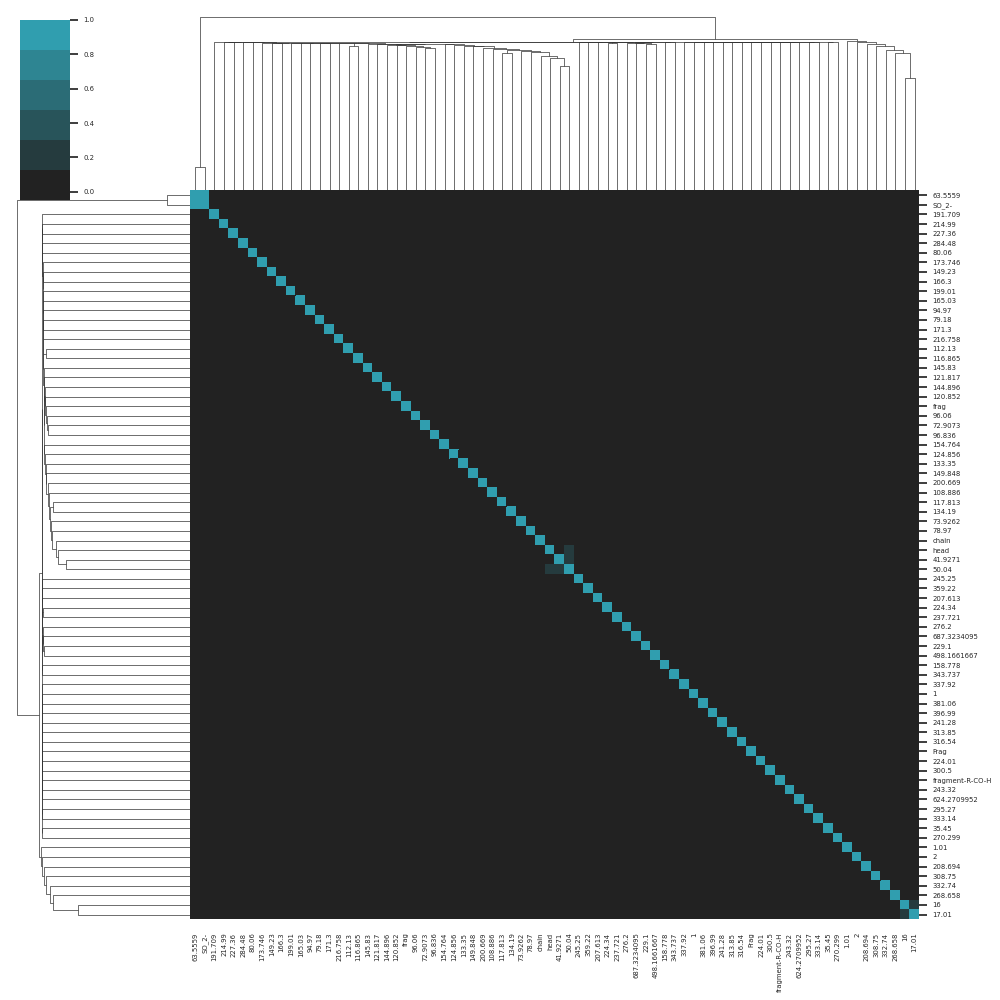

<IPython.core.display.Javascript object>


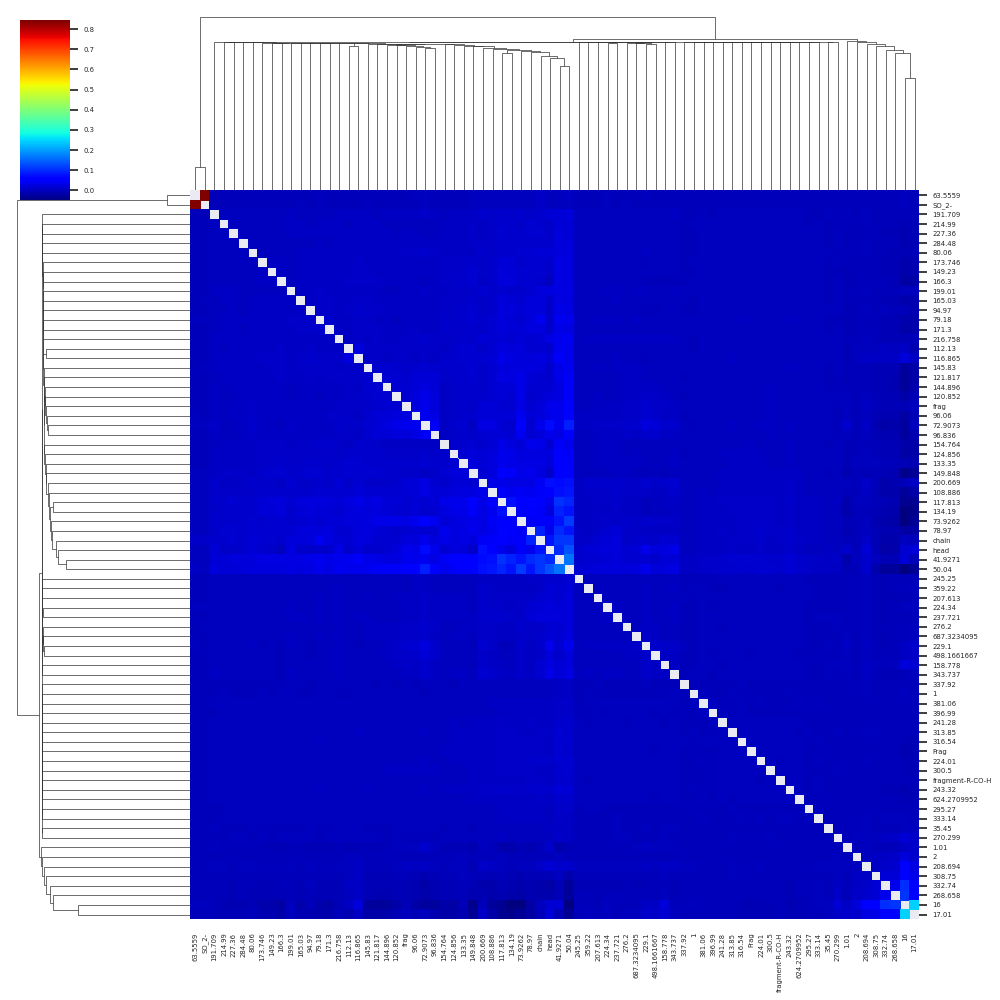

In [19]:
%matplotlib notebook
sns.set(font_scale= 0.45)
# fig = plt.figure()

# Generate a mask for the upper triangle
mask = np.diag(np.diag(np.ones_like(corr, dtype=np.bool)))

cmap = sns.dark_palette((210, 90, 60), input="husl")

g = sns.clustermap(corr, cmap = cmap, yticklabels=True, xticklabels = True)#, xticklabels = labels, yticklabels = labels, square = True )

mask = mask[np.argsort(g.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(g.dendrogram_col.reordered_ind)]

plot = sns.clustermap(corr, cmap = 'jet' , mask = mask, yticklabels=True, xticklabels = True)

plot.savefig('clustermap_unlabelled_germinal_slices_immune_labels_all.jpg',format='jpg', dpi=1200)

## 3d heatmap taking mean of every 5 slices

In [20]:
df = get_df_3d_k('./data/pixel_unlabelled_zero_int.npy', unlabelled_labels)

In [21]:
corr = df.corr()

<IPython.core.display.Javascript object>


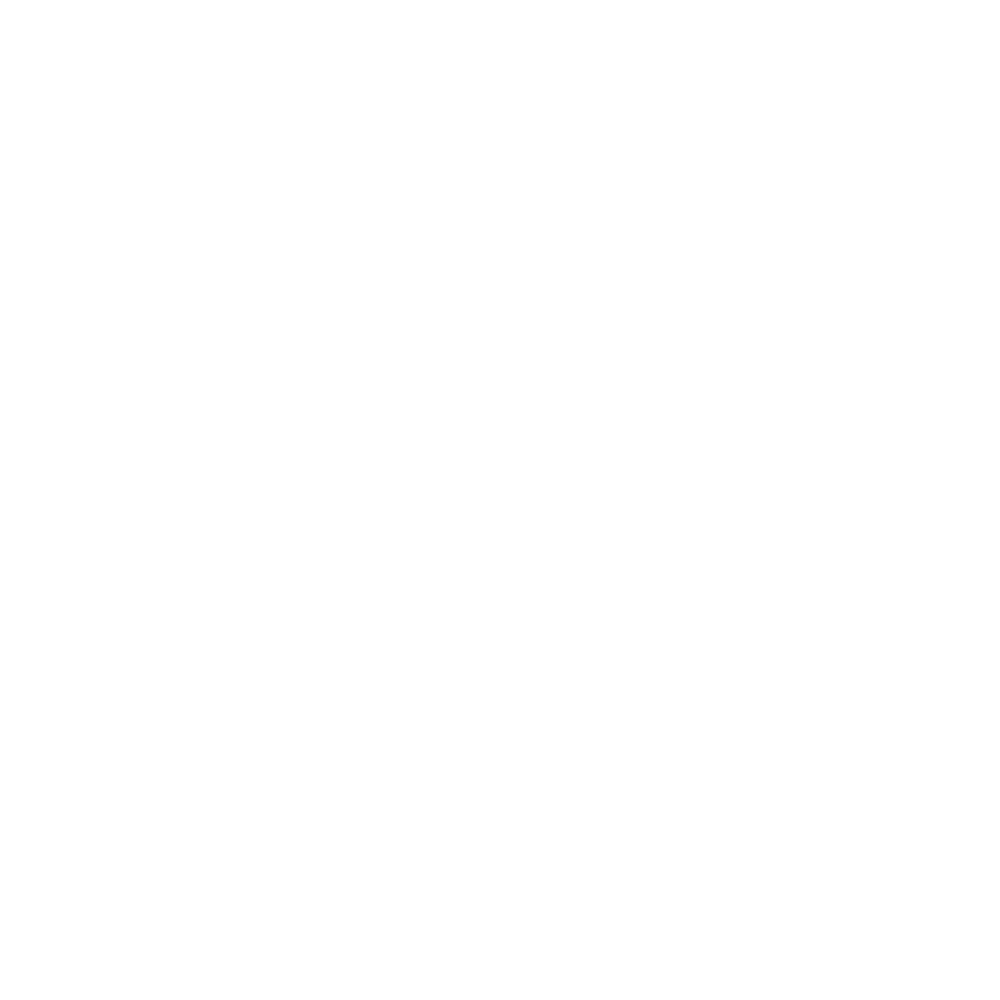

<IPython.core.display.Javascript object>


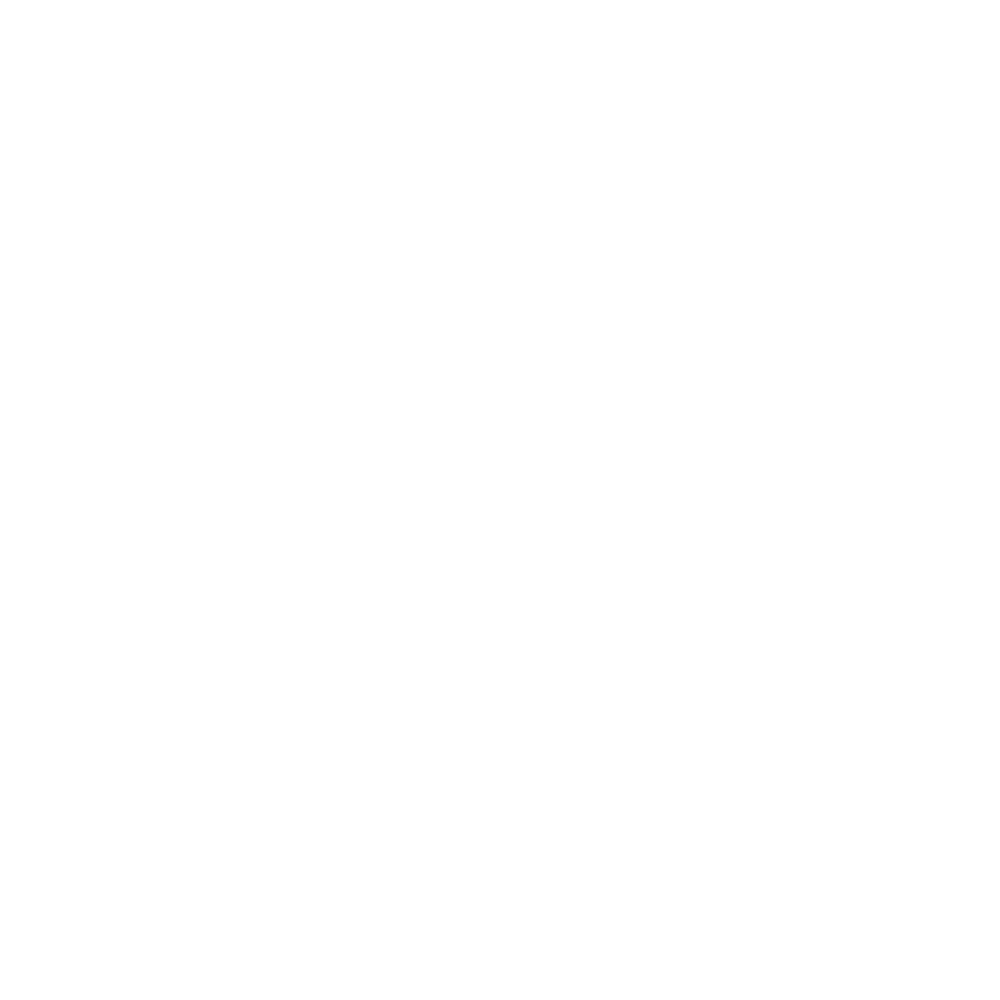

In [22]:
%matplotlib notebook
sns.set(font_scale= 0.45)
# fig = plt.figure()

# Generate a mask for the upper triangle
mask = np.diag(np.diag(np.ones_like(corr, dtype=np.bool)))

cmap = sns.dark_palette((210, 90, 60), input="husl")

g = sns.clustermap(corr, cmap = cmap, yticklabels=True, xticklabels = True)#, xticklabels = labels, yticklabels = labels, square = True )

mask = mask[np.argsort(g.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(g.dendrogram_col.reordered_ind)]

plot = sns.clustermap(corr, cmap = 'jet' , mask = mask, yticklabels=True, xticklabels = True)

plot.savefig('clustermap_unlabelled_germinal_slices_immune_labels_all_5slices.jpg',format='jpg', dpi=1200)

## 3D heat map with 20 slices mean

In [23]:
df = get_df_3d_k('./data/pixel_unlabelled_zero_int.npy', unlabelled_labels, k =20)

In [24]:
corr = df.corr()

<IPython.core.display.Javascript object>


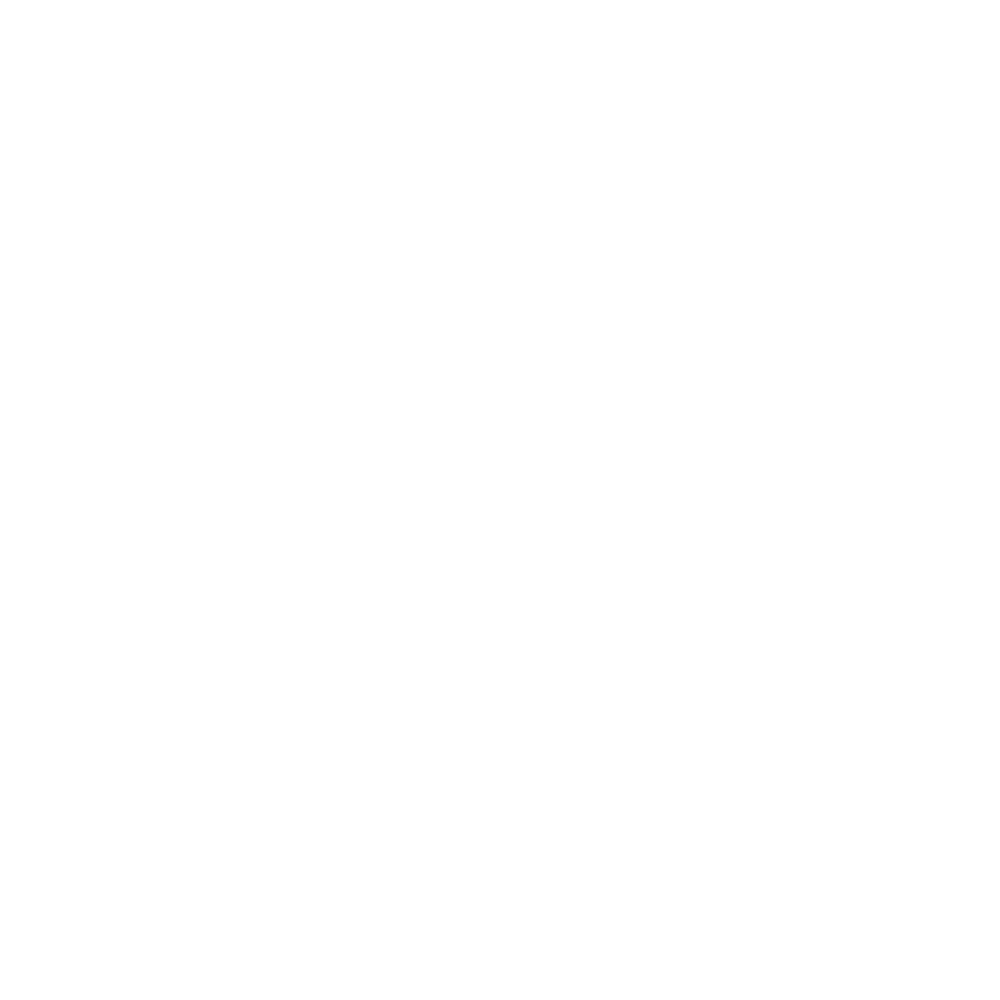

<IPython.core.display.Javascript object>


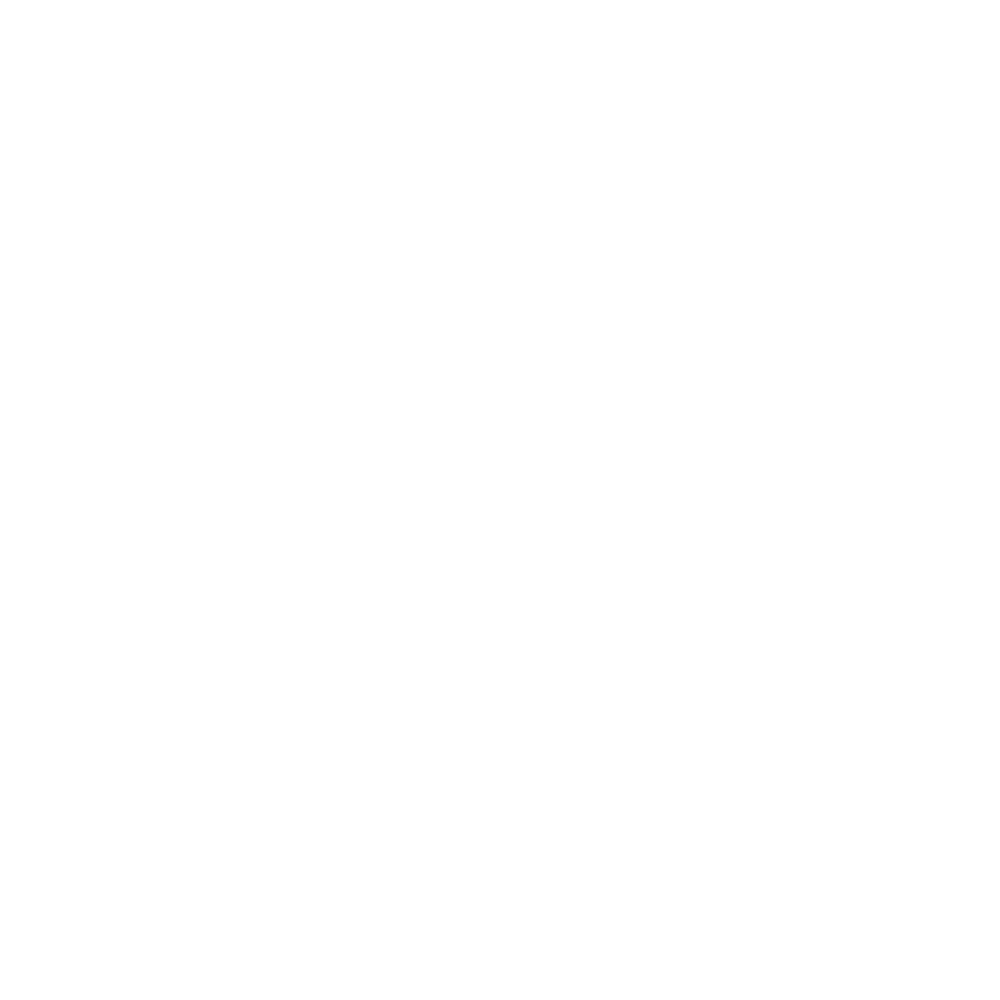

In [25]:
%matplotlib notebook
sns.set(font_scale= 0.45)
# fig = plt.figure()

# Generate a mask for the upper triangle
mask = np.diag(np.diag(np.ones_like(corr, dtype=np.bool)))

cmap = sns.dark_palette((210, 90, 60), input="husl")

g = sns.clustermap(corr, cmap = cmap, yticklabels=True, xticklabels = True)#, xticklabels = labels, yticklabels = labels, square = True )

mask = mask[np.argsort(g.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(g.dendrogram_col.reordered_ind)]

plot = sns.clustermap(corr, cmap = 'jet' , mask = mask, yticklabels=True, xticklabels = True)

plot.savefig('clustermap_unlabelled_germinal_slices_immune_labels_all_20slices.jpg',format='jpg', dpi=1200)

## 3D heat map with all slices mean

In [26]:
df = get_df_3d_k('./data/pixel_unlabelled_zero_int.npy', unlabelled_labels, k = 138)

In [27]:
corr = df.corr()

<IPython.core.display.Javascript object>


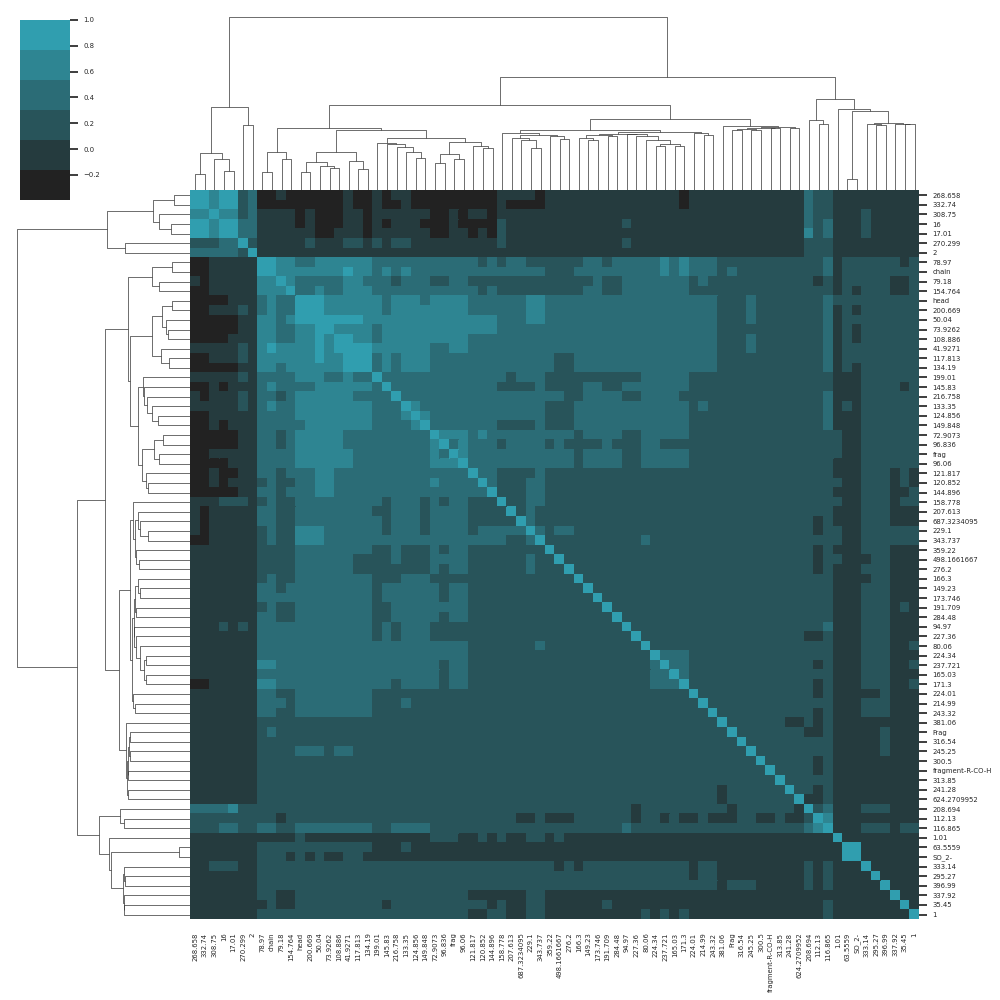

<IPython.core.display.Javascript object>


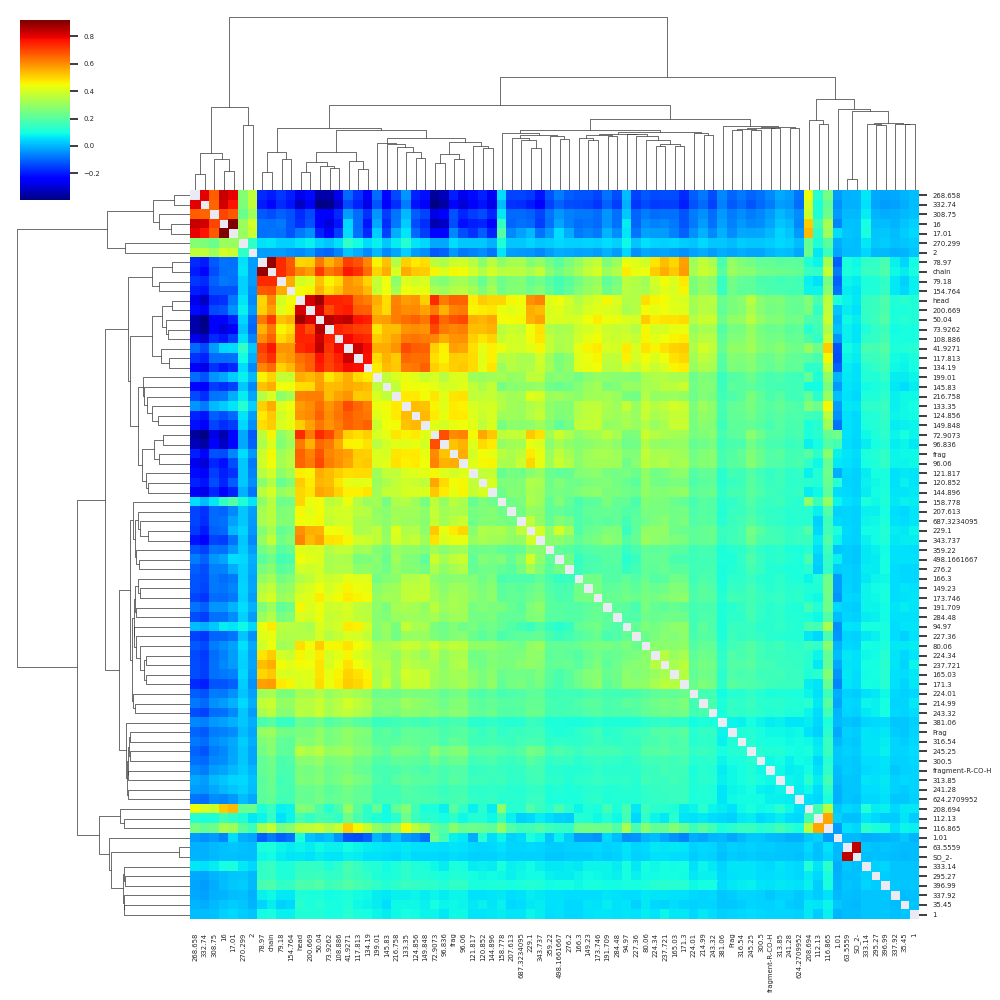

In [28]:
%matplotlib notebook
sns.set(font_scale= 0.45)
# fig = plt.figure()

# Generate a mask for the upper triangle
mask = np.diag(np.diag(np.ones_like(corr, dtype=np.bool)))

cmap = sns.dark_palette((210, 90, 60), input="husl")

g = sns.clustermap(corr, cmap = cmap, yticklabels=True, xticklabels = True)#, xticklabels = labels, yticklabels = labels, square = True )

mask = mask[np.argsort(g.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(g.dendrogram_col.reordered_ind)]

plot = sns.clustermap(corr, cmap = 'jet' , mask = mask, yticklabels=True, xticklabels = True)

plot.savefig('clustermap_unlabelled_germinal_slices_immune_labels_all_meanslices.jpg',format='jpg', dpi=1200)